#Modelo Proyectos iaot

A continuacion se muestra el codigo usado para diseñar los modelos de prediccion de las categorias para el seguidor de actividad fisica que en su caso se llama Cardio Health

Presentado por:

Nelson Andres Delgado Machado - 2238511

Jhon Edinson Caicedo Loaiza - 2238514

Miguel Angel Acevedo Delgado - 2238684

Jesus Antonio Valencia Escobar - 2238688

MODELOS EDGE IMPULSE

https://studio.edgeimpulse.com/public/321012/latest (MODELO DENSO 1)

https://studio.edgeimpulse.com/public/321128/latest  (MODELO CONVOLUCIONAL)

https://studio.edgeimpulse.com/public/321140/latest (MODELO DENSO 2)



Se sube al drive los archivos necesarios para este proyecto, en este caso se monto todo al drive de google

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Se importan todas las librerias necesarias para la creacion de los modelos en este caso tambien se importan los reportes de clasificacion entre otros.

In [ ]:
# Se cargan las dependencias necesarias
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from tensorflow.keras.optimizers.legacy import Adamax

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl

Para verificar que si se esta importando los json, se importa un solo archivo verificando los datos, luego de eso se importan los valores a 7 seg, a su vez se indica cuantos datos tiene el training.

              protected                                                         signature                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

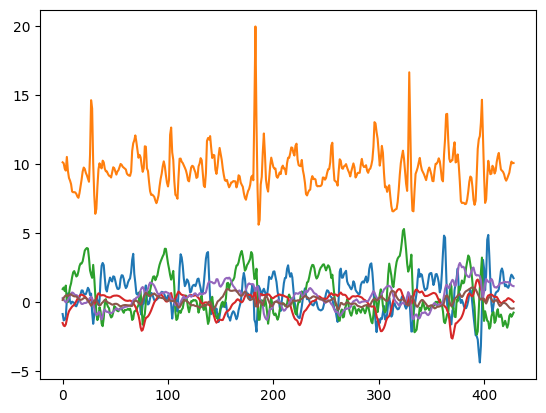

In [ ]:
RutaFile="/content/gdrive/MyDrive/datosproyecto/aiotfinal-export/training/caminar.json.4giderdr.ingestion-68dcc647f9-cs244.json"
dataframe = pd.read_json(RutaFile)
print(dataframe.to_string())
Valores = dataframe.iloc[:,:].values
print(Valores.shape)
print(Valores)
print(Valores[7,2][0:-1])

DatosOri1=Valores[7,2][0:-1]
Datos1=np.array(DatosOri1)
print(Datos1.shape)
plt.plot(Datos1)

El código proporcionado en Python utiliza la biblioteca pandas para leer archivos JSON desde el directorio training. Se ordenan los nombres de archivo y se inicializa una matriz NumPy llamada "Datos" para almacenar los datos extraídos. Se itera sobre cada archivo, se lee como un DataFrame de pandas, y se selecciona una columna específica de interés, asumiendo una estructura particular en los archivos JSON. Los valores seleccionados se almacenan en la matriz "Datos".

In [ ]:
import os
directory = '/content/gdrive/MyDrive/datosproyecto/aiotfinal-export/training/'
files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

Datos=np.zeros((cantidadFiles*429,6))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  Datos[i*429:(i+1)*429] = DatosOriNP[0:429]
  i+=1
print(Datos.shape)



(17160, 6)


En la siguiente linea se imprimen los nombres de los archivos

In [ ]:
print(files)

['caminar.json.4giderdr.ingestion-68dcc647f9-cs244.json', 'caminar.json.4gidg8gn.ingestion-68dcc647f9-r7nsq.json', 'caminar.json.4gidh028.ingestion-68dcc647f9-r7nsq.json', 'caminar.json.4gidiohq.ingestion-68dcc647f9-cs244.json', 'caminar.json.4gidj942.ingestion-68dcc647f9-cs244.json', 'caminar.json.4gidk0rp.ingestion-68dcc647f9-r7nsq.json', 'caminar.json.4gidkni9.ingestion-68dcc647f9-r7nsq.json', 'caminar.json.4gidlfcg.ingestion-68dcc647f9-cs244.json', 'movimientoLaterales.json.4gieupl4.ingestion-68dcc647f9-r7nsq.json', 'movimientoLaterales.json.4gievaq8.ingestion-68dcc647f9-cs244.json', 'movimientoLaterales.json.4gif0e0i.ingestion-68dcc647f9-r7nsq.json', 'movimientoLaterales.json.4gif0tpg.ingestion-68dcc647f9-2s44n.json', 'movimientoLaterales.json.4gif1scn.ingestion-68dcc647f9-r7nsq.json', 'movimientoLaterales.json.4gif2sm1.ingestion-68dcc647f9-2s44n.json', 'movimientoLaterales.json.4gif3hbb.ingestion-68dcc647f9-cs244.json', 'movimientoLaterales.json.4gif45hh.ingestion-68dcc647f9-2s44

Se grafica la variable llamada Datos que contiene todas las variables.

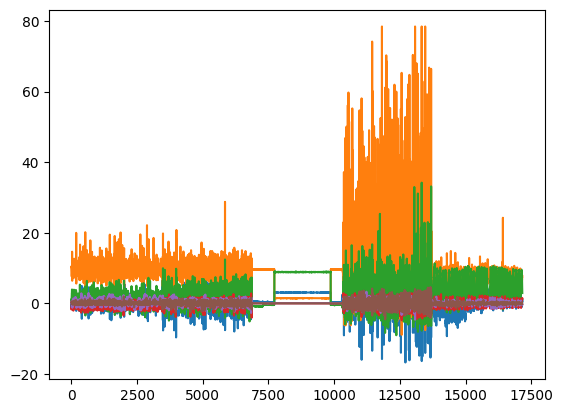

In [ ]:
plt.plot(Datos)

A continuacion se realiza la division de los datos entre x e y

Para las ventanas de Xtrain se tiene lo siguiente:

Cantidad de ventanas es 60
6 canales
muestras calculadas 17160/60=286

In [ ]:
Xtrain=np.zeros((286,60,6))

for i in range(286):
    Xtrain[i,:,0]=Datos[i*60:(i+1)*60,0].T
    Xtrain[i,:,1]=Datos[i*60:(i+1)*60,1].T
    Xtrain[i,:,2]=Datos[i*60:(i+1)*60,2].T
    Xtrain[i,:,3]=Datos[i*60:(i+1)*60,3].T
    Xtrain[i,:,4]=Datos[i*60:(i+1)*60,4].T
    Xtrain[i,:,5]=Datos[i*60:(i+1)*60,5].T

print(Xtrain.shape)


(286, 60, 6)


Se imprime Xtrain

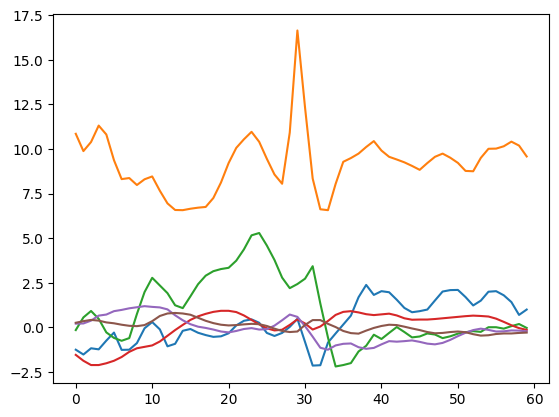

In [ ]:
plt.plot(Xtrain[5,:,:])

En este fragmento de código en Python, se crea un array NumPy llamado "YtrainIni" de forma (286,1) que se utilizará para almacenar las etiquetas correspondientes a distintas clases. Se asignan etiquetas numéricas a cada rango de índices en el array, representando diferentes actividades. Por ejemplo, los primeros 57 elementos representan la clase "Caminar", los siguientes 57 la clase "movimientoLaterales", y así sucesivamente. Al imprimir el array "YtrainIni", se puede observar cómo se han asignado las etiquetas a cada rango específico. Este array se utilizará posteriormente como las etiquetas de entrenamiento para asociarlas a los datos previamente procesados en tu código anterior.

In [ ]:
YtrainIni=np.zeros((286,1))
for i in range(57):
    YtrainIni[i]=0 #Caminar

for i in range(57,114):
    YtrainIni[i]=1 # movimientoLaterales

for i in range(114,171):
    YtrainIni[i]=2 # quieto

for i in range(171,228):
    YtrainIni[i]=3 # saltos

for i in range(228,286):
    YtrainIni[i]=4 # sentadilla

print(YtrainIni)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.

Se transforma Ytrain en categorico

In [ ]:
Ytrain= to_categorical(YtrainIni)
print(Ytrain)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


###Datos Validacion

Este fragmento de código en Python está destinado a procesar datos de prueba. Similar al código que procesa datos de entrenamiento, este script lee archivos JSON desde un directorio específico de prueba, ordena los nombres de archivo, y luego extrae datos particulares de cada archivo para construir un array NumPy llamado "DatosVal". Una vez que se ha construido el array "DatosVal", el código imprime la forma del array con print(DatosVal.shape). Además, intenta trazar los datos con plt.plot(DatosVal).

(4290, 6)


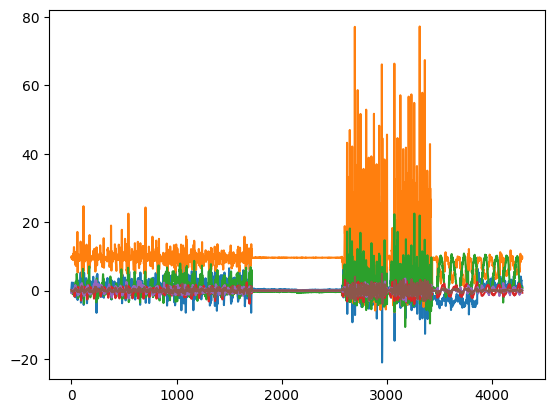

In [ ]:
directory = '/content/gdrive/MyDrive/datosproyecto/aiotfinal-export/testing/'
files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

DatosVal=np.zeros((cantidadFiles*429,6))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  DatosVal[i*429:(i+1)*429] = DatosOriNP[0:429]
  i+=1
print(DatosVal.shape)
plt.plot(DatosVal)

Para las ventanas de Xval se tiene lo siguiente:

Cantidad de ventanas es 60 6 canales muestras calculadas 4290/60=71.5

Este fragmento de código en Python crea un array tridimensional llamado "XVal". Este array se utiliza para almacenar datos de prueba y tiene una forma de (71, 60, 6). La estructura de este array sugiere que estás trabajando con secuencias temporales de longitud 60, cada una con 6 características.

In [ ]:
XVal=np.zeros((71,60,6))

for i in range(71):
    XVal[i,:,0]=DatosVal[i*60:(i+1)*60,0].T
    XVal[i,:,1]=DatosVal[i*60:(i+1)*60,1].T
    XVal[i,:,2]=DatosVal[i*60:(i+1)*60,2].T
    XVal[i,:,3]=DatosVal[i*60:(i+1)*60,3].T
    XVal[i,:,4]=DatosVal[i*60:(i+1)*60,4].T
    XVal[i,:,5]=DatosVal[i*60:(i+1)*60,5].T

print(XVal.shape)

(71, 60, 6)


Se grafica Xval

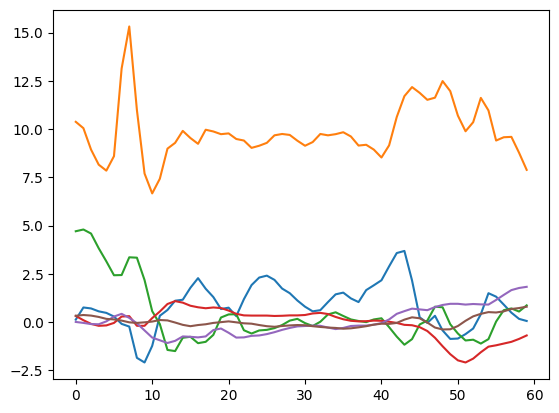

In [ ]:
plt.plot(XVal[5,:,:])

Este fragmento de código en Python se encarga de asignar etiquetas a los datos de prueba y luego convierte esas etiquetas en un formato adecuado para su uso en modelos de aprendizaje profundo. Primero, se crea un array NumPy llamado "YValIni" con forma (71, 1) y se asignan etiquetas numéricas a diferentes rangos de índices. En este caso, los primeros 14 elementos se etiquetan como "Caminar," los siguientes 14 como "movimientoLaterales," y así sucesivamente. Luego, se imprime el array "YValIni" para visualizar las etiquetas asignadas.

Posteriormente, se utiliza la función to_categorical para convertir estas etiquetas numéricas en un formato de codificación one-hot

In [ ]:
YValIni=np.zeros((71,1))
for i in range(14):
    YValIni[i]=0 #Caminar

for i in range(14,28):
    YValIni[i]=1 # movimientoLaterales

for i in range(28,42):
    YValIni[i]=2 # quieto

for i in range(42,56):
    YValIni[i]=3 # saltos

for i in range(56,71):
    YValIni[i]=4 # sentadilla

print(YValIni)
Yval = to_categorical(YValIni)
print(Yval)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0

##Modelo 1 Conv

Este código en Python define un modelo de red neuronal convolucional (CNN) utilizando la biblioteca Keras. La arquitectura del modelo consiste en dos capas de convolución 1D seguidas por capas completamente conectadas. La primera capa convolucional tiene 220 filtros, utiliza una ventana (kernel) de tamaño 3, y emplea la función de activación ReLU. La segunda capa convolucional tiene 130 filtros y también utiliza ReLU como función de activación. Después de las capas de convolución, se agrega una capa de aplanado (Flatten) para convertir la salida en un formato unidimensional. A continuación, se añaden tres capas completamente conectadas con funciones de activación ReLU, seguidas de capas de dropout para regularización. La última capa tiene 5 neuronas con una función de activación softmax, adecuada para problemas de clasificación multiclase.  Este modelo está diseñado para trabajar con secuencias de longitud 60 y 6 características.

CALCULO DE PARAMETROS
- conv1d_11 (Conv1D):

  Número de parámetros = (tamaño del kernel × Numero  de canales de entrada+1) × Numero  de filtros

  En este caso:

  ( 6 × 3 + 1) × 220= 4180

- conv1d_12 (Conv1D):

  Número de parámetros = (tamaño del kernel × Numero  de canales de entrada+1) × Numero  de filtros

  ( 1 × 220 + 1 ) × 130 = 85.930

- dense_12 (Dense):
  
  Número de parámetros = (Numero  de unidades en la capa anterior+1)× Numero  de unidades en esta capa

  (7.800+1) × 100 = 780.100

- dense_13 (Dense):
  
  (100+1) × 50 =5.050

- dense_14 (Dense):

 (50+1) × 20 = 1.020

- dense_15 (Dense):
        
  (20+1)×5=105

Total de parámetros: 876,385.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 60, 220)           4180      
                                                                 
 conv1d_12 (Conv1D)          (None, 60, 130)           85930     
                                                                 
 flatten_3 (Flatten)         (None, 7800)              0         
                                                                 
 dense_12 (Dense)            (None, 100)               780100    
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dropout_11 (Dropout)        (None, 50)               

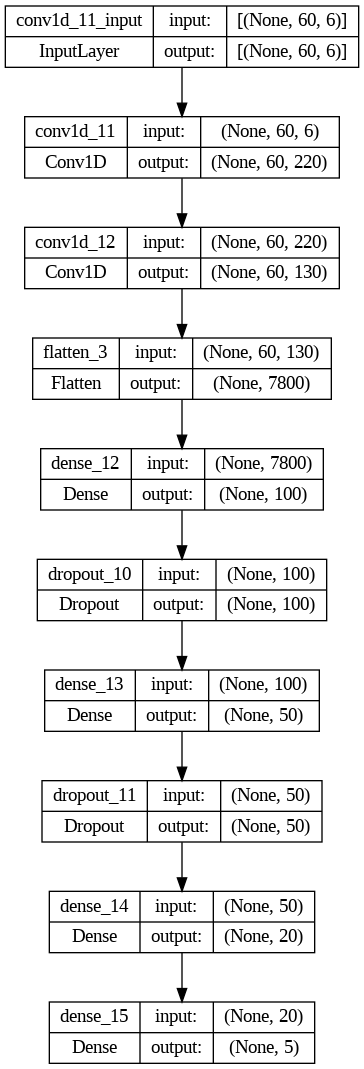

In [ ]:
#Definición del modeloConv2
modeloConv1 = Sequential()
modeloConv1.add(Conv1D(220, 3, activation="relu",padding="same", input_shape=(60,6)))
modeloConv1.add(Conv1D(130, 3, activation="relu",padding="same"))

modeloConv1.add(Flatten())
modeloConv1.add(Dense(100,activation="relu"))
modeloConv1.add(Dropout(0.25))
modeloConv1.add(Dense(50, activation="relu"))
modeloConv1.add(Dropout(0.4))
modeloConv1.add(Dense(20, activation="relu"))
modeloConv1.add(Dense(5, activation = 'softmax'))
modeloConv1.summary()

keras.utils.plot_model(modeloConv1, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

Se realiza un callbacks con paciencia de 30, esto con el fin de que si el modelo se aprenda su entrenamiento y no mejore pare.

In [ ]:
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

En este fragmento de código, se compila el modelo de red neuronal convolucional (CNN) mediante el uso de la función de pérdida 'categorical_crossentropy', especialmente apropiada para problemas de clasificación multiclase, y el optimizador 'adam'. Además, se especifica la métrica de evaluación como 'accuracy' para monitorear el rendimiento del modelo durante el entrenamiento. Posteriormente, el modelo se entrena utilizando los datos de entrenamiento (Xtrain e Ytrain) y se valida con los datos de prueba (XVal e Yval). El entrenamiento se realiza a lo largo de 1000 épocas con un tamaño de lote de 32, y se emplea la técnica de parada temprana (callbacks=[ES]) para evitar el sobreajuste. La información del entrenamiento se almacena en el objeto historia para su posterior análisis.

In [ ]:
modeloConv1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = modeloConv1.fit(Xtrain,Ytrain, validation_data=(XVal,Yval),callbacks=[ES],epochs=1000,batch_size=32,verbose=1)

Epoch 1/1000
9/9 [==============================] - 3s 48ms/step - loss: 1.7312 - accuracy: 0.2203 - val_loss: 1.5086 - val_accuracy: 0.3521
Epoch 2/1000
9/9 [==============================] - 0s 13ms/step - loss: 1.3498 - accuracy: 0.4161 - val_loss: 1.3463 - val_accuracy: 0.5352
Epoch 3/1000
9/9 [==============================] - 0s 19ms/step - loss: 1.0433 - accuracy: 0.5804 - val_loss: 1.1125 - val_accuracy: 0.6197
Epoch 4/1000
9/9 [==============================] - 0s 14ms/step - loss: 0.8600 - accuracy: 0.6538 - val_loss: 1.1778 - val_accuracy: 0.6056
Epoch 5/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.7357 - accuracy: 0.6923 - val_loss: 1.1000 - val_accuracy: 0.6479
Epoch 6/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.6665 - accuracy: 0.7483 - val_loss: 1.0282 - val_accuracy: 0.8451
Epoch 7/1000
9/9 [==============================] - 0s 13ms/step - loss: 0.5758 - accuracy: 0.7727 - val_loss: 0.9803 - val_accuracy: 0.7042
Epoch 8/1000


Se grafican los datos

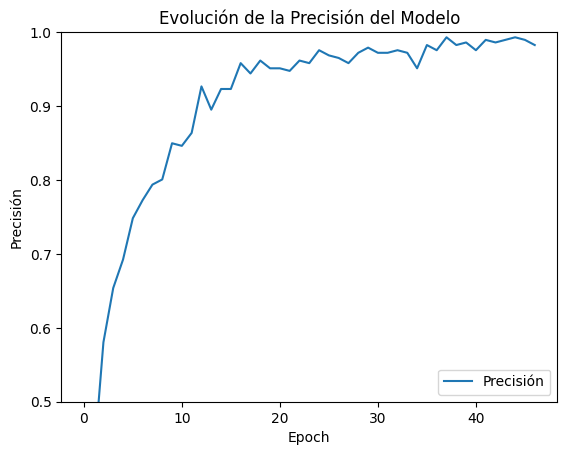

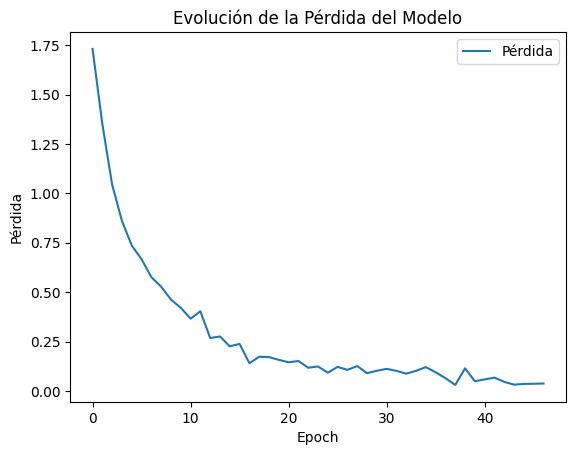

In [ ]:
plt.plot(historia.history['accuracy'], label='Precisión')
plt.title('Evolución de la Precisión del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(historia.history['loss'], label='Pérdida')
plt.title('Evolución de la Pérdida del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()

Se guarda el modelo

In [ ]:
modeloConv1.save('modeloConv1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


cantidad 4290/60=71.5


Se muestra la evaluacion del modelo

In [ ]:
modeloConv1.evaluate(XVal, Yval)

3/3 [==============================] - 0s 11ms/step - loss: 0.9288 - accuracy: 0.9296


[0.9287760853767395, 0.9295774698257446]

Se utilizan las predicciones del modelo entrenado (ypredic) para evaluar su rendimiento en comparación con las etiquetas reales de los datos de prueba (Yval), asi mismo se calculan las metricas de evaluacion para observar el rendimiento del modelo

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      1.00      0.93        14
           2       0.93      0.93      0.93        14
           3       0.86      0.86      0.86        14
           4       1.00      0.87      0.93        15

    accuracy                           0.93        71
   macro avg       0.93      0.93      0.93        71
weighted avg       0.93      0.93      0.93        71

[[14  0  0  0  0]
 [ 0 14  0  0  0]
 [ 0  1 13  0  0]
 [ 0  1  1 12  0]
 [ 0  0  0  2 13]]


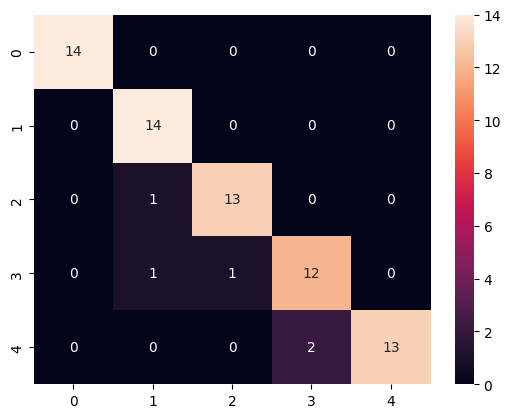

In [ ]:
ypredic=modeloConv1.predict(XVal)

y_test_class = np.argmax(Yval,axis=1)
y_pred_class = np.argmax(ypredic,axis=1)

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

##Modelo 2 denso

Para el modelo denso Se siguen el mismo paso a paso, se grafican los datos

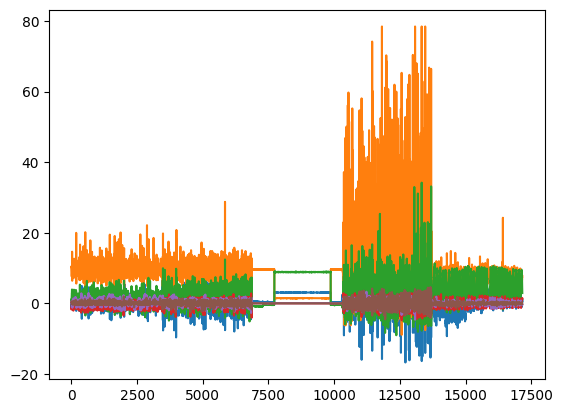

In [ ]:
plt.plot(Datos)

Se crea un conjunto de datos denso, se tiene en cuenta que el modelo tiene 286 muestras, se toman seis caracteristicas de tiempo en la cantidad de ventanas que son 60 en este caso da como resultado 360.

In [ ]:
Xtraindenso=np.zeros((286,360))
for i in range(286):
    Xtraindenso[i,:] = np.concatenate((Datos[i*60:(i+1)*60, 0].T,
                                  Datos[i*60:(i+1)*60, 1].T,
                                  Datos[i*60:(i+1)*60, 2].T,
                                  Datos[i*60:(i+1)*60, 3].T,
                                  Datos[i*60:(i+1)*60, 4].T,
                                  Datos[i*60:(i+1)*60, 5].T), axis=0)


Se imprime el tamaño de Xtraindenso

In [ ]:
print(Xtraindenso.shape)

(286, 360)


Se grafica Xtraindenso

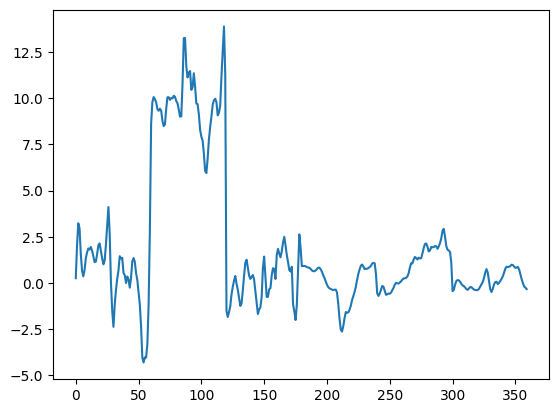

In [ ]:
plt.plot(Xtraindenso[10,:])

asigna etiquetas a un conjunto de datos denso (Ytraindens) de manera similar al código que asignaba etiquetas al conjunto de datos original. Se crea un array NumPy llamado Ytraindens con forma (286, 1) y se asignan etiquetas numéricas a diferentes rangos de índices. Los primeros 57 elementos se etiquetan como "Caminar," los siguientes 57 como "movimientoLaterales," y así sucesivamente. Luego, se imprime el array Ytraindens para visualizar las etiquetas asignadas. Posteriormente se transforman esos datos en categoricos.

In [ ]:
Ytraindens=np.zeros((286,1))
for i in range(57):
    Ytraindens[i]=0 #Caminar

for i in range(57,114):
    Ytraindens[i]=1 # movimientoLaterales

for i in range(114,171):
    Ytraindens[i]=2 # quieto

for i in range(171,228):
    Ytraindens[i]=3 # saltos

for i in range(228,286):
    Ytraindens[i]=4 # sentadilla

print(Ytraindens)
Ytraindso = to_categorical(Ytraindens)
print(Ytraindso)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.

Se exportan los datos de testeo nuevamente

(4290, 6)


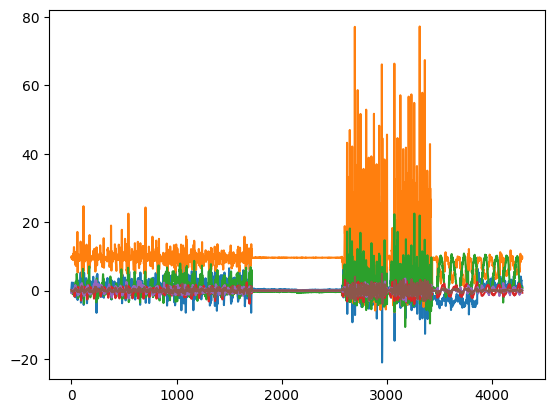

In [ ]:
directory = '/content/gdrive/MyDrive/datosproyecto/aiotfinal-export/testing/'
files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

DatosVal=np.zeros((cantidadFiles*429,6))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  DatosVal[i*429:(i+1)*429] = DatosOriNP[0:429]
  i+=1
print(DatosVal.shape)
plt.plot(DatosVal)

Este fragmento de código crea un conjunto de datos denso de prueba (Xvaldenso) de manera similar al conjunto de datos de entrenamiento denso que se construyó anteriormente. Para cada una de las 71 muestras, se toman las seis características de cada punto de tiempo en la secuencia de longitud 60 y se concatenan para formar un único vector de longitud 360. Esto se realiza mediante la función np.concatenate, que combina las seis características de cada punto de tiempo para construir un vector denso que representa la muestra completa. El resultado es un conjunto de datos denso de prueba con forma (71, 360), que puede ser utilizado como entrada para modelos de aprendizaje profundo que requieren una representación unidimensional de los datos de prueba.

In [ ]:
Xvaldenso=np.zeros((71,360))
for i in range(71):
    Xvaldenso[i,:] = np.concatenate((DatosVal[i*60:(i+1)*60, 0].T,
                                  DatosVal[i*60:(i+1)*60, 1].T,
                                  DatosVal[i*60:(i+1)*60, 2].T,
                                  DatosVal[i*60:(i+1)*60, 3].T,
                                  DatosVal[i*60:(i+1)*60, 4].T,
                                  DatosVal[i*60:(i+1)*60, 5].T), axis=0)


Se imprime Xvaldenso en el conjunto de datos

In [ ]:
print(Xvaldenso.shape)

(71, 360)


Este fragmento de código asigna etiquetas a un conjunto de datos denso de prueba (Yvaldens) de manera similar al código que asignaba etiquetas al conjunto de datos de prueba original. Se crea un array NumPy llamado Yvaldens con forma (71, 1) y se asignan etiquetas numéricas a diferentes rangos de índices. Los primeros 14 elementos se etiquetan como "Caminar," los siguientes 14 como "movimientoLaterales," y así sucesivamente. Luego, se imprime el array Yvaldens para visualizar las etiquetas asignadas.

In [ ]:
Yvaldens=np.zeros((71,1))
for i in range(14):
    Yvaldens[i]=0 #Caminar

for i in range(14,28):
    Yvaldens[i]=1 # movimientoLaterales

for i in range(28,42):
    Yvaldens[i]=2 # quieto

for i in range(42,56):
    Yvaldens[i]=3 # saltos

for i in range(56,71):
    Yvaldens[i]=4 # sentadilla

print(Yvaldens)
Yvaldso = to_categorical(Yvaldens)
print(Yvaldso)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0

En la siguiente seccion de codigo se define un modelo de red neuronal utilizando la biblioteca Keras. El modelo es secuencial y consta de cuatro capas densas, cada una seguida de una capa de regularización de actividad con penalización L1 para mitigar el sobreajuste. La primera capa tiene 50 neuronas con función de activación ReLU, seguida de una capa de dropout para la regularización. La segunda capa tiene 20 neuronas con activación ReLU y otra capa de dropout. La tercera capa tiene 10 neuronas con activación ReLU. La capa de salida tiene 5 neuronas con activación softmax, representando las clases del problema. El modelo busca balancear la complejidad mediante la regularización y se presenta un resumen detallado de su arquitectura. Además, se genera un esquema visual del modelo para una comprensión más intuitiva de su estructura.

- dense_67 (Dense):

(360+1) x 50 = 18050

- dense_68 (Dense):

 (50+1) × 20=1020

- dense_69 (Dense):

  (20+1)×10=210

- dense_70 (Dense):

  (10+1)×5=55

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 50)                18050     
                                                                 
 dropout_41 (Dropout)        (None, 50)                0         
                                                                 
 dense_68 (Dense)            (None, 20)                1020      
                                                                 
 dropout_42 (Dropout)        (None, 20)                0         
                                                                 
 dense_69 (Dense)            (None, 10)                210       
                                                                 
 dense_70 (Dense)            (None, 5)                 55        
                                                                 
Total params: 19335 (75.53 KB)
Trainable params: 1933

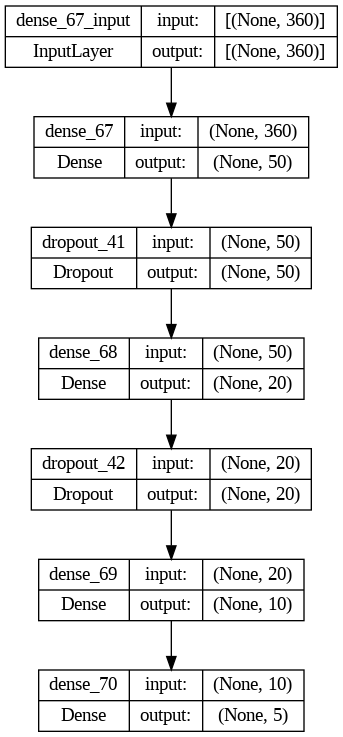

In [ ]:
# Se crea el modelo secuencial en Keras con capas densas y regularización
modelodp2 = keras.models.Sequential()
modelodp2.add(keras.layers.Dense(50, input_shape=(360,), activation='relu', activity_regularizer=tf.keras.regularizers.l1(0.00001)))
modelodp2.add(keras.layers.Dropout(0.15))
modelodp2.add(keras.layers.Dense(20, activation='relu', activity_regularizer=tf.keras.regularizers.l1(0.00001)))
modelodp2.add(keras.layers.Dropout(0.2))
modelodp2.add(keras.layers.Dense(10, activation='relu', activity_regularizer=tf.keras.regularizers.l1(0.00001)))
modelodp2.add(keras.layers.Dense(5, activation="softmax", activity_regularizer=tf.keras.regularizers.l1(0.00001)))

# Se muestra el resumen de la arquitectura del modelo
modelodp2.summary()

# Se muestra un esquema del modelo
keras.utils.plot_model(modelodp2, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)



Se realiza un earlystopping por si el modelo no mejora

In [ ]:
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

A continuacion se compila y entrena el modelo de red neuronal que se define, se utiliza el método compile para configurar el modelo con la función de pérdida 'categorical_crossentropy', el optimizador Adamax con una tasa de aprendizaje de 0.0005, y métricas de precisión. Luego, el modelo se entrena utilizando el conjunto de datos de entrenamiento denso (Xtraindenso e Ytraindso) con validación en el conjunto de datos de prueba denso (Xvaldenso e Yvaldso). El entrenamiento se realiza a lo largo de 1000 épocas con un tamaño de lote de 32, y se imprime información detallada sobre el proceso de entrenamiento (verbose=1).

In [ ]:
modelodp2.compile(loss='categorical_crossentropy', optimizer=Adamax(learning_rate=0.0005, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])
historia = modelodp2.fit(Xtraindenso,Ytraindso, validation_data=(Xvaldenso,Yvaldso),epochs=1000,batch_size=32,verbose=1)

Epoch 1/1000
9/9 [==============================] - 1s 32ms/step - loss: 2.4491 - accuracy: 0.1608 - val_loss: 1.8000 - val_accuracy: 0.0986
Epoch 2/1000
9/9 [==============================] - 0s 9ms/step - loss: 1.8827 - accuracy: 0.1678 - val_loss: 1.6376 - val_accuracy: 0.2535
Epoch 3/1000
9/9 [==============================] - 0s 9ms/step - loss: 1.6792 - accuracy: 0.2343 - val_loss: 1.5632 - val_accuracy: 0.3099
Epoch 4/1000
9/9 [==============================] - 0s 9ms/step - loss: 1.6876 - accuracy: 0.2238 - val_loss: 1.5373 - val_accuracy: 0.3380
Epoch 5/1000
9/9 [==============================] - 0s 9ms/step - loss: 1.6825 - accuracy: 0.2028 - val_loss: 1.5243 - val_accuracy: 0.3380
Epoch 6/1000
9/9 [==============================] - 0s 10ms/step - loss: 1.6055 - accuracy: 0.2483 - val_loss: 1.5142 - val_accuracy: 0.3239
Epoch 7/1000
9/9 [==============================] - 0s 10ms/step - loss: 1.6133 - accuracy: 0.2657 - val_loss: 1.5110 - val_accuracy: 0.3380
Epoch 8/1000
9/9 

Se guarda el modelo

In [ ]:
modelodp2.save('modelodp2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Se grafica el entrenamiento del modelo, en este caso el accuracy y el loss

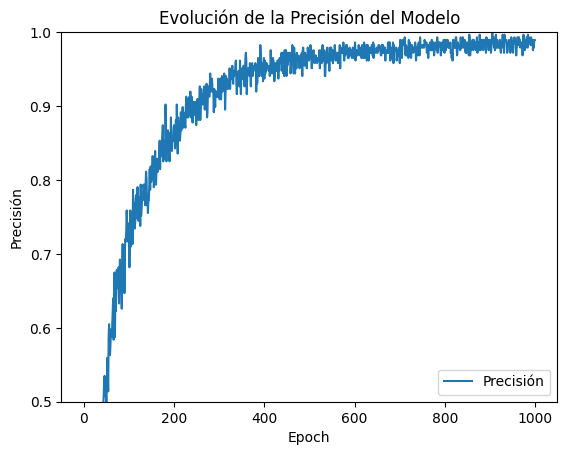

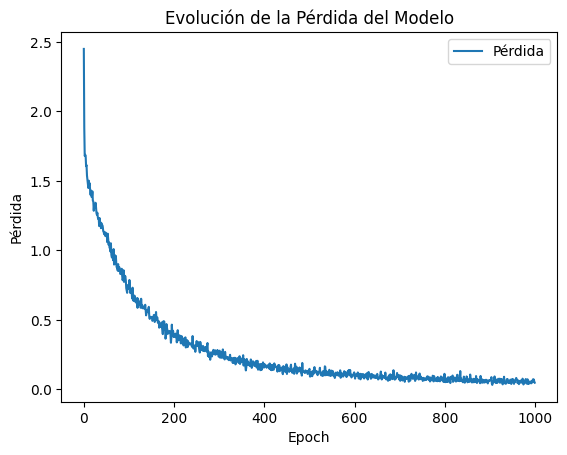

In [ ]:
plt.plot(historia.history['accuracy'], label='Precisión')
plt.title('Evolución de la Precisión del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(historia.history['loss'], label='Pérdida')
plt.title('Evolución de la Pérdida del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()

Se realiza la evaluacion del modelo

In [ ]:
modelodp2.evaluate(Xvaldenso,Yvaldso)

3/3 [==============================] - 0s 5ms/step - loss: 0.8064 - accuracy: 0.8592


[0.8064133524894714, 0.8591549396514893]

Se realiza la prediccion del modelo, asi mismo se muestra el reporte de clasificacion y se imprime la matriz de confusion.

3/3 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       0.92      0.79      0.85        14
           2       0.76      0.93      0.84        14
           3       0.93      0.93      0.93        14
           4       0.91      0.67      0.77        15

    accuracy                           0.86        71
   macro avg       0.87      0.86      0.86        71
weighted avg       0.87      0.86      0.86        71

[[14  0  0  0  0]
 [ 2 11  0  0  1]
 [ 1  0 13  0  0]
 [ 0  0  1 13  0]
 [ 0  1  3  1 10]]


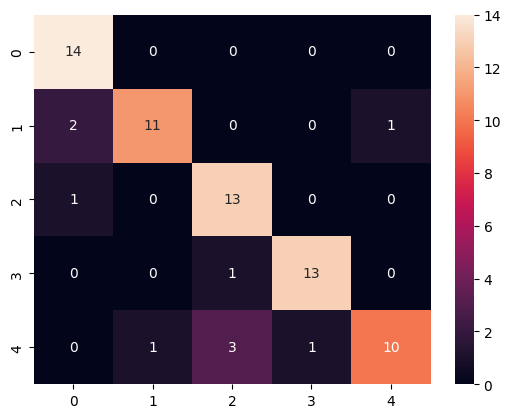

In [ ]:
ypredic1=modelodp2.predict(Xvaldenso)

y_test_class1 = np.argmax(Yvaldso,axis=1)
y_pred_class1 = np.argmax(ypredic1,axis=1)

#Accuracy of the predicted values
print(classification_report(y_test_class1, y_pred_class1)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class1, y_pred_class1)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

##Modelo 3 denso

Se grafican los Datos

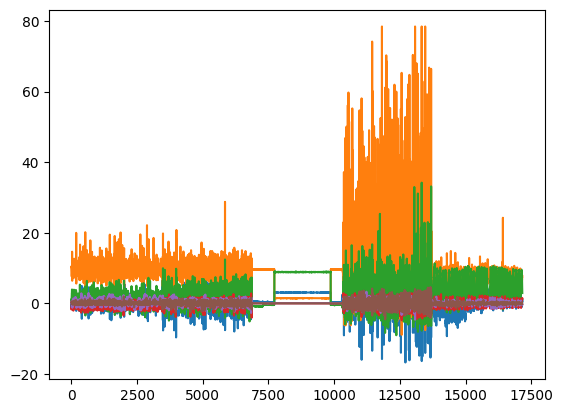

In [ ]:
plt.plot(Datos)

En la siguiente seccion de codigo,  se crea un nuevo conjunto de datos denso (Xtraindenso1) a partir de un conjunto de datos previamente procesado (Datos). Para cada una de las 286 muestras, se toman las seis características de cada punto de tiempo en la secuencia de longitud 60 y se concatenan para formar un único vector de longitud 360. Esto se logra mediante la función np.concatenate, que combina las seis características de cada punto de tiempo para construir un vector denso que representa la muestra completa. El resultado es un conjunto de datos denso con forma (286, 360).

In [ ]:
Xtraindenso1=np.zeros((286,360))
for i in range(286):
    Xtraindenso1[i,:] = np.concatenate((Datos[i*60:(i+1)*60, 0].T,
                                  Datos[i*60:(i+1)*60, 1].T,
                                  Datos[i*60:(i+1)*60, 2].T,
                                  Datos[i*60:(i+1)*60, 3].T,
                                  Datos[i*60:(i+1)*60, 4].T,
                                  Datos[i*60:(i+1)*60, 5].T), axis=0)


Se imprime el tamaño de Xtraindenso

In [ ]:
print(Xtraindenso1.shape)

(286, 360)


Se realiza la grafica de Xtraindenso1 en este caso desde 10

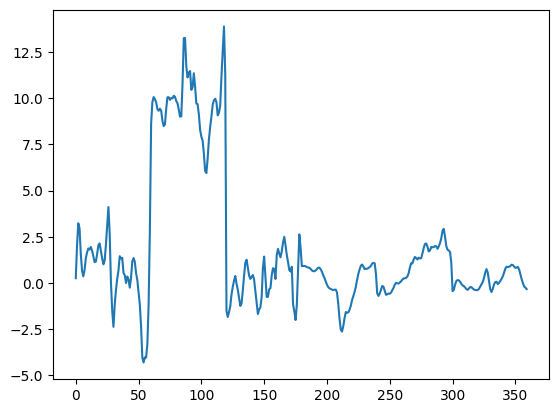

In [ ]:
plt.plot(Xtraindenso1[10,:])

A continuacion, se asignan etiquetas a un conjunto de datos denso de entrenamiento (Ytraindens1). Se crea un array llamado Ytraindens1 con forma (286, 1), donde se asignan etiquetas numéricas a diferentes rangos de índices. Por ejemplo, los primeros 57 elementos se etiquetan como "Caminar," los siguientes 57 como "movimientoLaterales," y así sucesivamente. Posteriormente, se utiliza la función to_categorical para convertir estas etiquetas numéricas en un formato de codificación one-hot (Ytraindso1).

In [ ]:
Ytraindens1=np.zeros((286,1))
for i in range(57):
    Ytraindens1[i]=0 #Caminar

for i in range(57,114):
    Ytraindens1[i]=1 # movimientoLaterales

for i in range(114,171):
    Ytraindens1[i]=2 # quieto

for i in range(171,228):
    Ytraindens1[i]=3 # saltos

for i in range(228,286):
    Ytraindens1[i]=4 # sentadilla

print(Ytraindens1)
Ytraindso1 = to_categorical(Ytraindens1)
print(Ytraindso1)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.

En la siguiente seccion de codigo se procesa datos de prueba desde un directorio específico. Se leen archivos JSON en un bucle, y para cada archivo, se extraen valores específicos de un DataFrame de pandas. En este caso, se asume una estructura específica del archivo JSON, donde se accede a la séptima fila y la tercera columna (índices 7, 2) y se elimina el último elemento del resultado. Los valores seleccionados se almacenan en un array  llamado "DatosVal", que se dimensiona para contener 429 filas y 6 columnas, multiplicado por la cantidad de archivos en el directorio; finalmente se grafica Datos Val

(4290, 6)


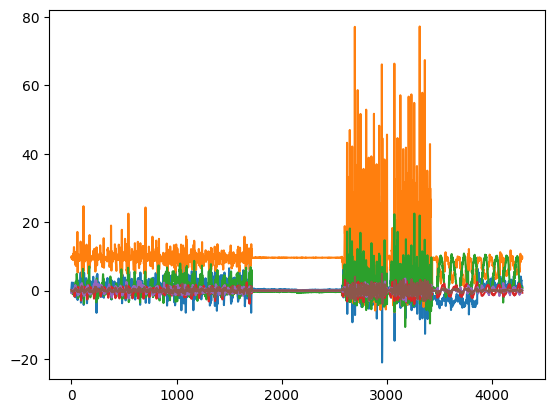

In [ ]:
directory = '/content/gdrive/MyDrive/datosproyecto/aiotfinal-export/testing/'
files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

DatosVal=np.zeros((cantidadFiles*429,6))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  DatosVal[i*429:(i+1)*429] = DatosOriNP[0:429]
  i+=1
print(DatosVal.shape)
plt.plot(DatosVal)

Se genera un conjunto de datos denso de prueba (Xvaldenso1) a partir de los datos de prueba previamente procesados (DatosVal). Para cada una de las 71 muestras, se toman las seis características de cada punto de tiempo en la secuencia de longitud 60 y se concatenan para formar un único vector de longitud 360. La función np.concatenate se utiliza para combinar las características de cada punto de tiempo y construir así un vector denso que representa la muestra completa. El resultado es un conjunto de datos denso de prueba con forma (71, 360).

In [ ]:
Xvaldenso1=np.zeros((71,360))
for i in range(71):
    Xvaldenso1[i,:] = np.concatenate((DatosVal[i*60:(i+1)*60, 0].T,
                                  DatosVal[i*60:(i+1)*60, 1].T,
                                  DatosVal[i*60:(i+1)*60, 2].T,
                                  DatosVal[i*60:(i+1)*60, 3].T,
                                  DatosVal[i*60:(i+1)*60, 4].T,
                                  DatosVal[i*60:(i+1)*60, 5].T), axis=0)


Se imprime el tamaño Xvaldenso1

In [ ]:
print(Xvaldenso1.shape)

(71, 360)


se asignan etiquetas a un conjunto de datos denso de prueba (Yvaldens1). Se crea un array  llamado Yvaldens1 con forma (71, 1), donde se asignan etiquetas numéricas a diferentes rangos de índices. Por ejemplo, los primeros 14 elementos se etiquetan como "Caminar," los siguientes 14 como "movimientoLaterales," y así sucesivamente. Luego, se imprime el array Yvaldens1 para visualizar las etiquetas asignadas.

In [ ]:
Yvaldens1=np.zeros((71,1))
for i in range(14):
    Yvaldens1[i]=0 #Caminar

for i in range(14,28):
    Yvaldens1[i]=1 # movimientoLaterales

for i in range(28,42):
    Yvaldens1[i]=2 # quieto

for i in range(42,56):
    Yvaldens1[i]=3 # saltos

for i in range(56,71):
    Yvaldens1[i]=4 # sentadilla

print(Yvaldens1)
Yvaldso1 = to_categorical(Yvaldens1)
print(Yvaldso1)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0

Se define un modelo de red neuronal utilizando la biblioteca Keras. El modelo es secuencial y consta de seis capas densas. Cada capa densa está precedida por una capa de regularización de actividad utilizando la regularización L1 con un parámetro de penalización de 0.00001.

- dense_62 (Dense):
  
  Número de parámetros = (Numero de unidades en la capa anterior+1)× Numero de unidades en esta capa
   
  (360+1) × 100=36100

- dense_63 (Dense):

  (100+1)×50=5050

- dense_64 (Dense):
        
  (50+1)×20=1020

- dense_65 (Dense):

 (20+1)×10=210

- dense_66 (Dense):

 (10+1)×5=55

Total de parámetros: 42,435.

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 100)               36100     
                                                                 
 dropout_38 (Dropout)        (None, 100)               0         
                                                                 
 dense_63 (Dense)            (None, 50)                5050      
                                                                 
 dropout_39 (Dropout)        (None, 50)                0         
                                                                 
 dense_64 (Dense)            (None, 20)                1020      
                                                                 
 dense_65 (Dense)            (None, 10)                210       
                                                                 
 dropout_40 (Dropout)        (None, 10)              

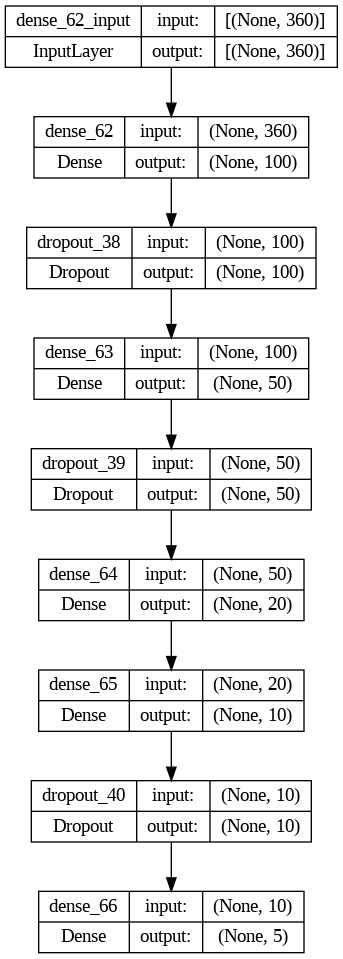

In [ ]:
# Se crea el modelo secuencial en Keras con capas densas y regularización
modelodp3 = keras.models.Sequential()
modelodp3.add(keras.layers.Dense(100, input_shape=(360,), activation='relu', activity_regularizer=tf.keras.regularizers.l1(0.00001)))
modelodp3.add(keras.layers.Dropout(0.15))
modelodp3.add(keras.layers.Dense(50, activation='relu', activity_regularizer=tf.keras.regularizers.l1(0.00001)))
modelodp3.add(keras.layers.Dropout(0.2))
modelodp3.add(keras.layers.Dense(20, activation='relu', activity_regularizer=tf.keras.regularizers.l1(0.00001)))

modelodp3.add(keras.layers.Dense(10, activation='relu', activity_regularizer=tf.keras.regularizers.l1(0.00001)))
modelodp3.add(keras.layers.Dropout(0.2))
modelodp3.add(keras.layers.Dense(5, activation="softmax", activity_regularizer=tf.keras.regularizers.l1(0.00001)))

# Se muestra el resumen de la arquitectura del modelo
modelodp3.summary()

# Se muestra un esquema del modelo
keras.utils.plot_model(modelodp3, to_file='model_plotdenso3.png', show_shapes=True, show_layer_names=True)



Se utiliza el earlystopping, esto con el fin de que si el entrenamiento no mejora este se detenga

In [ ]:
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

En la siguiente seccion se compila y entrena el modelo de red neuronal que has definido previamente. Primero, se utiliza el método compile para configurar el modelo con la función de pérdida 'categorical_crossentropy', el optimizador Adamax con una tasa de aprendizaje de 0.0005, y métricas de precisión. Luego, el modelo se entrena utilizando el conjunto de datos de entrenamiento denso (Xtraindenso e Ytraindso) con validación en el conjunto de datos de prueba denso (Xvaldenso e Yvaldso). El entrenamiento se realiza a lo largo de 1000 épocas con un tamaño de lote de 32, y se imprime información detallada sobre el proceso de entrenamiento (verbose=1).

In [ ]:
modelodp3.compile(loss='categorical_crossentropy', optimizer=Adamax(learning_rate=0.0005, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])
historia = modelodp3.fit(Xtraindenso,Ytraindso, validation_data=(Xvaldenso,Yvaldso),epochs=1000,batch_size=32,verbose=1)

Epoch 1/1000
9/9 [==============================] - 1s 47ms/step - loss: 2.7344 - accuracy: 0.2028 - val_loss: 1.7005 - val_accuracy: 0.1972
Epoch 2/1000
9/9 [==============================] - 0s 10ms/step - loss: 1.9069 - accuracy: 0.2343 - val_loss: 1.4673 - val_accuracy: 0.2817
Epoch 3/1000
9/9 [==============================] - 0s 12ms/step - loss: 1.6659 - accuracy: 0.3042 - val_loss: 1.4144 - val_accuracy: 0.3662
Epoch 4/1000
9/9 [==============================] - 0s 12ms/step - loss: 1.6127 - accuracy: 0.3077 - val_loss: 1.4018 - val_accuracy: 0.3521
Epoch 5/1000
9/9 [==============================] - 0s 11ms/step - loss: 1.5157 - accuracy: 0.3357 - val_loss: 1.3720 - val_accuracy: 0.3662
Epoch 6/1000
9/9 [==============================] - 0s 10ms/step - loss: 1.5680 - accuracy: 0.3182 - val_loss: 1.3466 - val_accuracy: 0.3803
Epoch 7/1000
9/9 [==============================] - 0s 13ms/step - loss: 1.4728 - accuracy: 0.3182 - val_loss: 1.3313 - val_accuracy: 0.3662
Epoch 8/1000


A continuacion se guarda el modelo

In [ ]:
modelodp3.save('modelodp3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Se grafica la precision y las perdidas del modelo

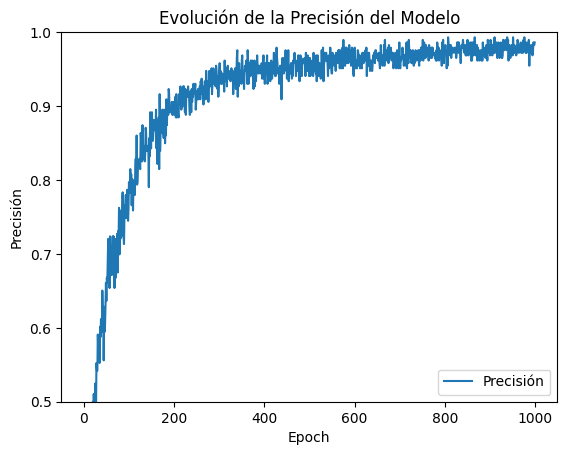

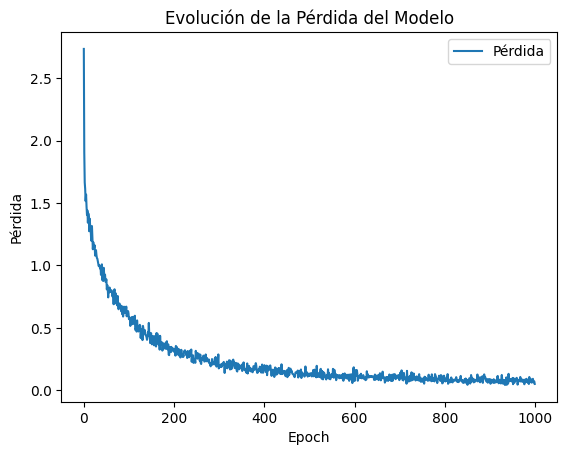

In [ ]:
plt.plot(historia.history['accuracy'], label='Precisión')
plt.title('Evolución de la Precisión del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(historia.history['loss'], label='Pérdida')
plt.title('Evolución de la Pérdida del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()

Se realiza la evaluacion del modelo

In [ ]:
modelodp3.evaluate(Xvaldenso,Yvaldso)

3/3 [==============================] - 0s 5ms/step - loss: 0.8601 - accuracy: 0.8310


[0.8601405024528503, 0.8309859037399292]

Se realiza la prediccion del modelo, asi mismo se diseña el reporte de clasificacion y asi se diseña la matriz de confusion.

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       0.92      0.79      0.85        14
           2       0.93      0.93      0.93        14
           3       0.92      0.86      0.89        14
           4       0.93      0.87      0.90        15

    accuracy                           0.89        71
   macro avg       0.89      0.89      0.89        71
weighted avg       0.90      0.89      0.89        71

[[14  0  0  0  0]
 [ 2 11  0  0  1]
 [ 1  0 13  0  0]
 [ 1  0  1 12  0]
 [ 0  1  0  1 13]]


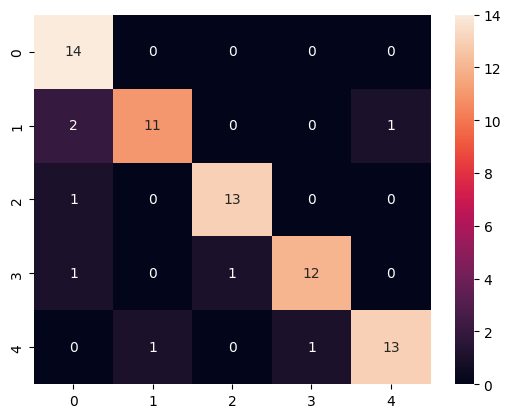

In [ ]:
ypredic1=modelodp3.predict(Xvaldenso)

y_test_class2 = np.argmax(Yvaldso,axis=1)
y_pred_class2 = np.argmax(ypredic1,axis=1)

#Accuracy of the predicted values
print(classification_report(y_test_class1, y_pred_class1)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class1, y_pred_class1)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")